In [1]:
import linopy
from linopy import Model
m=Model()
x = m.add_variables(lower=0, name = 'x')
y = m.add_variables(lower=0, name = 'y')
x

Variable
--------
x ∈ [0, inf]

In [2]:
# a constraint
3 * x + 7 * y >= 10

Constraint (unassigned)
-----------------------
+3 x + 7 y ≥ 10.0

In [3]:
# add constraint to model
m.add_constraints(3*x+7*y>=10)
m.add_constraints(5 * x + 2 * y >= 3)

Constraint `con1`
-----------------
+5 x + 2 y ≥ 3.0

In [4]:
# objective function always minimises
m.add_objective(x+2*y)

In [ ]:
m.solve()

('ok', 'optimal')

In [6]:
x.solution

<xarray.DataArray 'solution' ()> Size: 8B
array(0.03448276)

In [7]:
y.solution

<xarray.DataArray 'solution' ()> Size: 8B
array(1.4137931)

In [12]:
# next step is coordinates
# e.g. x is a 1d variable e.g. x is dependent on time (10 values)
import linopy
m = linopy.Model()

import pandas as pd
time = pd.Index(range(10), name = 'time')
x = m.add_variables(
    lower = 0,
    coords = [time],
    name = 'x'
)
y = m.add_variables(
    lower = 0,
    coords = [time],
    name = 'y'
)
x

Variable (time: 10)
-------------------
[0]: x[0] ∈ [0, inf]
[1]: x[1] ∈ [0, inf]
[2]: x[2] ∈ [0, inf]
[3]: x[3] ∈ [0, inf]
[4]: x[4] ∈ [0, inf]
[5]: x[5] ∈ [0, inf]
[6]: x[6] ∈ [0, inf]
[7]: x[7] ∈ [0, inf]
[8]: x[8] ∈ [0, inf]
[9]: x[9] ∈ [0, inf]

In [13]:
factor = pd.Series(time, index = time)
3*x + 7*y >= 10*factor

Constraint (unassigned) [time: 10]:
-----------------------------------
[0]: +3 x[0] + 7 y[0] ≥ -0.0
[1]: +3 x[1] + 7 y[1] ≥ 10.0
[2]: +3 x[2] + 7 y[2] ≥ 20.0
[3]: +3 x[3] + 7 y[3] ≥ 30.0
[4]: +3 x[4] + 7 y[4] ≥ 40.0
[5]: +3 x[5] + 7 y[5] ≥ 50.0
[6]: +3 x[6] + 7 y[6] ≥ 60.0
[7]: +3 x[7] + 7 y[7] ≥ 70.0
[8]: +3 x[8] + 7 y[8] ≥ 80.0
[9]: +3 x[9] + 7 y[9] ≥ 90.0

In [14]:
con1 = m.add_constraints(3 * x + 7 * y >= 10 * factor, name="con1")
con2 = m.add_constraints(5 * x + 2 * y >= 3 * factor, name="con2")

In [15]:
m

Linopy LP model

Variables:
----------
 * x (time)
 * y (time)

Constraints:
------------
 * con1 (time)
 * con2 (time)

Status:
-------
initialized

In [16]:
# objective function - about minimising function over all values of t so use sum func
obj = (x+2*y).sum()
m.add_objective(obj)
m.solve()

('ok', 'optimal')

In [17]:
x.solution

<xarray.DataArray 'solution' (time: 10)> Size: 80B
array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483])
Coordinates:
  * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9

<Axes: xlabel='time', ylabel='Optimal value'>

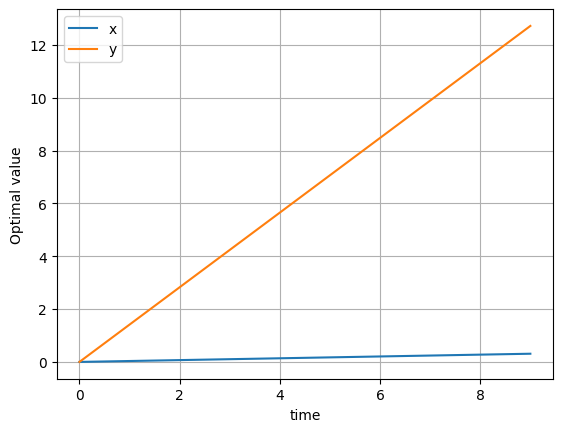

In [22]:
m.solution.to_dataframe().plot(grid = True, ylabel = 'Optimal value')